# Visualizing data

In this notebook we will look at the very basic of visualizing data with matplotlib, pandas and seaborn.

In [1]:
import numpy as np
import pandas as pd

## Basic matplotlib

In [2]:
# Importing the ploting module from matplotlib
from matplotlib import pyplot as plt

pyplot maintains an internal state with your plot that can be shown using `show` or saved using `savefig`

In [3]:
# Some sample data to be plottet
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

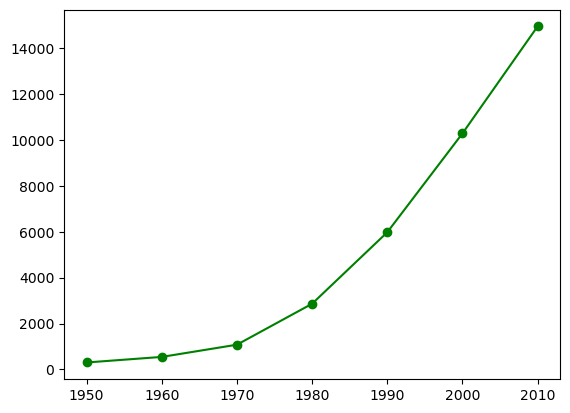

In [4]:
# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.show()

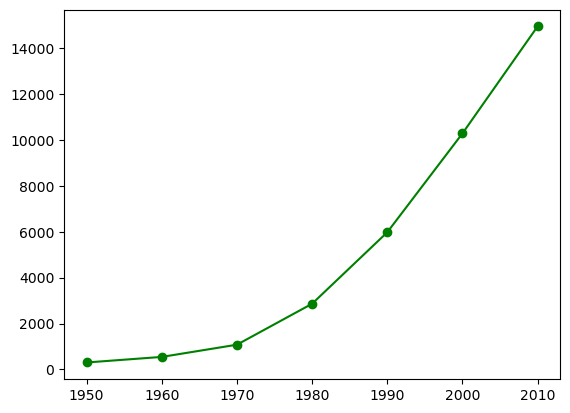

In [5]:
# Actually we do not need the show to see a single plot, but we get rid of output we do not need
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

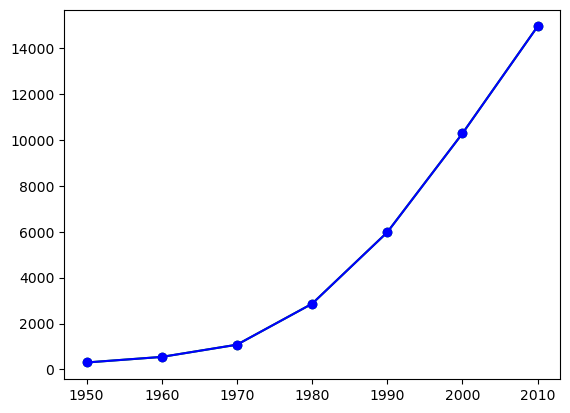

In [6]:
# Using show also allow us to have multiple plots i the same cell
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.plot(years, gdp, color='blue', marker='o', linestyle='solid')

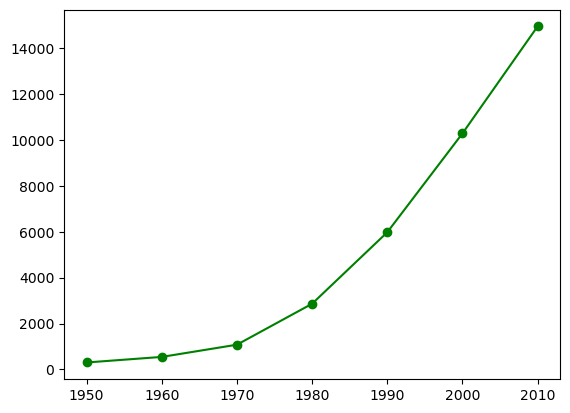

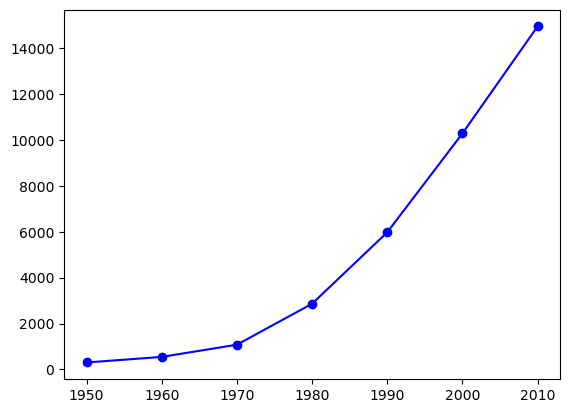

In [7]:
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.show()
plt.plot(years, gdp, color='blue', marker='o', linestyle='solid')
plt.show()

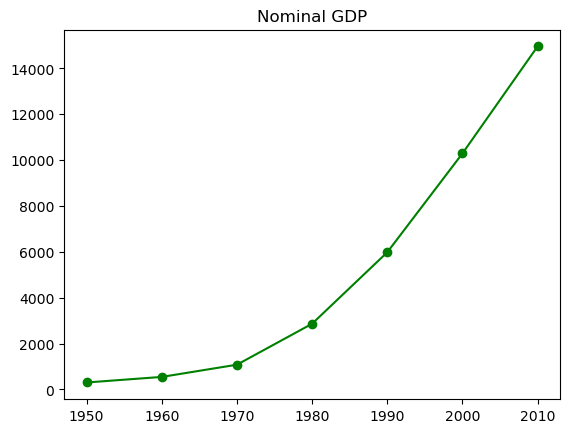

In [8]:
# Adding a title
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.show()

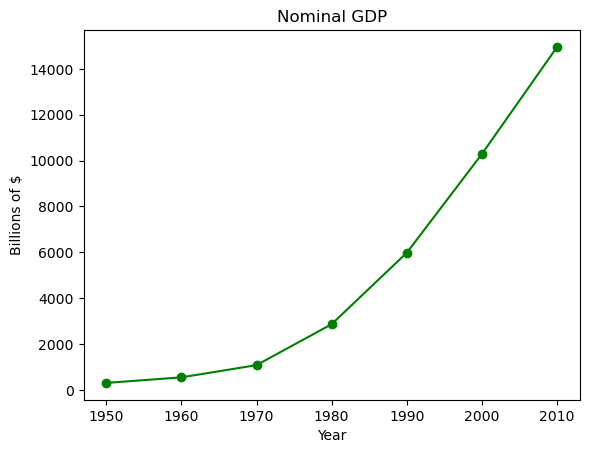

In [9]:
# Add a label to the x- and y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.xlabel("Year")
plt.ylabel("Billions of $")
plt.show()

### Saving a matplotlib plot to file

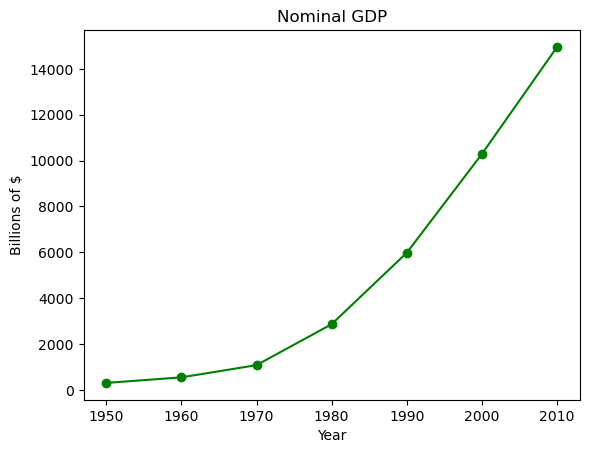

In [10]:
# Saving the plot
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.xlabel("Year")
plt.ylabel("Billions of $")
plt.savefig('img/viz_gdp.png')  # NOTE: Only work if you already have a sublibrary that is called "img"

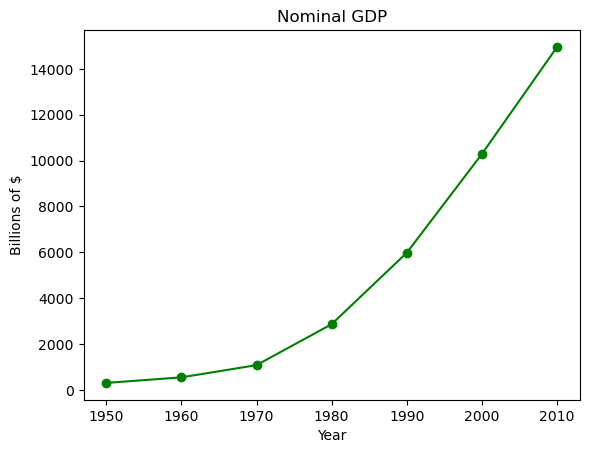

In [11]:
# Or in a higher resolution
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.xlabel("Year")
plt.ylabel("Billions of $")
plt.savefig('img/viz_gdp_high_res.png', dpi=600)

### Multiple plots

Plots in matplotlib reside in figures that can contain one or more subplots referred to as axes. We can set up such subplots in multiple ways (see [Python for Data Analysis, 3E](https://wesmckinney.com/book/) chapter 9), but here is one way:

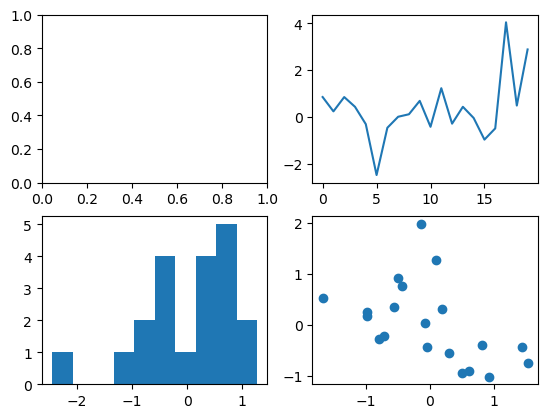

In [12]:
fig, axes = plt.subplots(2, 2)

axes[0,1].plot(np.random.standard_normal(20))
axes[1,0].hist(np.random.standard_normal(20))
axes[1,1].scatter(np.random.standard_normal(20), np.random.standard_normal(20))

### Chaning diplayed plot size in jupyter notebooks

In [13]:
plt.rc("figure", figsize=(10, 7)) # 10 is width and 7 is hight

Text(0, 0.5, 'Billions of $')

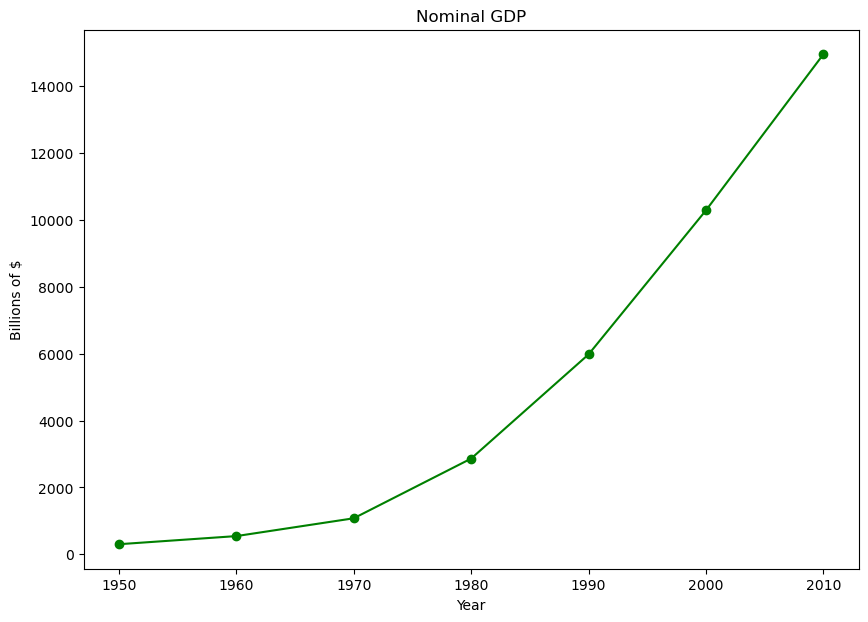

In [14]:
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.xlabel("Year")
plt.ylabel("Billions of $")

### Bar charts

In [15]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

<BarContainer object of 5 artists>

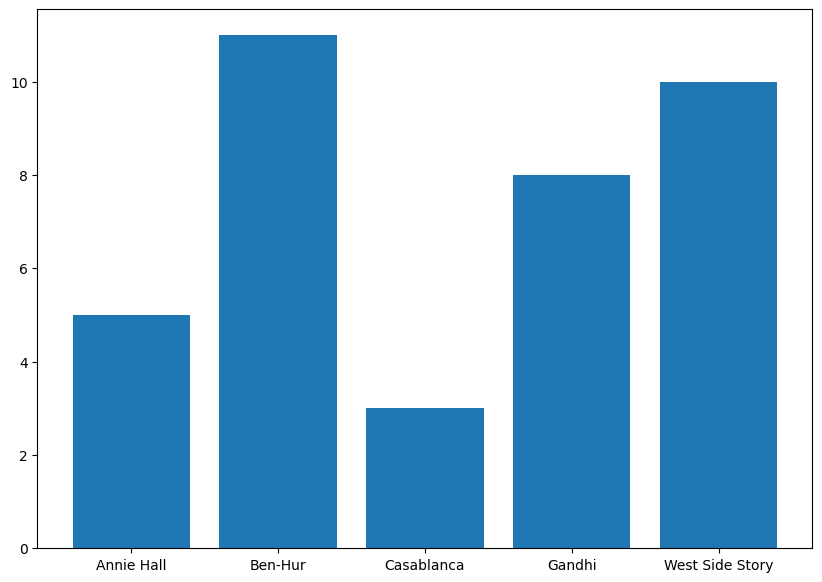

In [16]:
plt.bar(movies, num_oscars)

Text(0, 0.5, '# of Academy Awards')

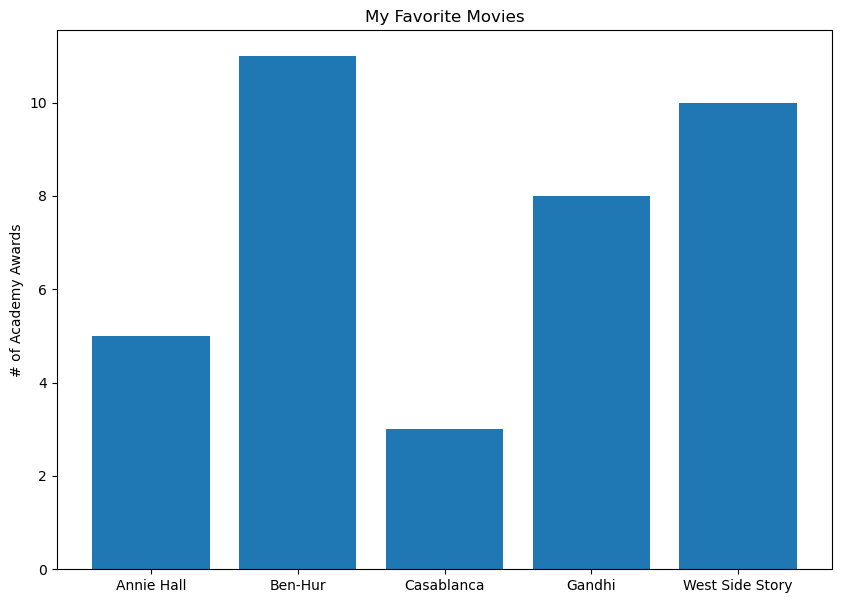

In [17]:
# plot bars with left x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]
plt.bar(movies, num_oscars)
plt.title("My Favorite Movies")     # add a title
plt.ylabel("# of Academy Awards")   # label the y-axis

In [18]:
# A bar chart using counters
movies2 = ["Annie Hall", "Casablanca", "Casablanca", "Ben-Hur", "Annie Hall", "Ben-Hur", "Casablanca",
          "Gandhi", "West Side Story", "Ben-Hur", "Ben-Hur", "Ben-Hur", "Ben-Hur",]

In [19]:
from collections import Counter

Counter(movies2)

Counter({'Ben-Hur': 6,
         'Casablanca': 3,
         'Annie Hall': 2,
         'Gandhi': 1,
         'West Side Story': 1})

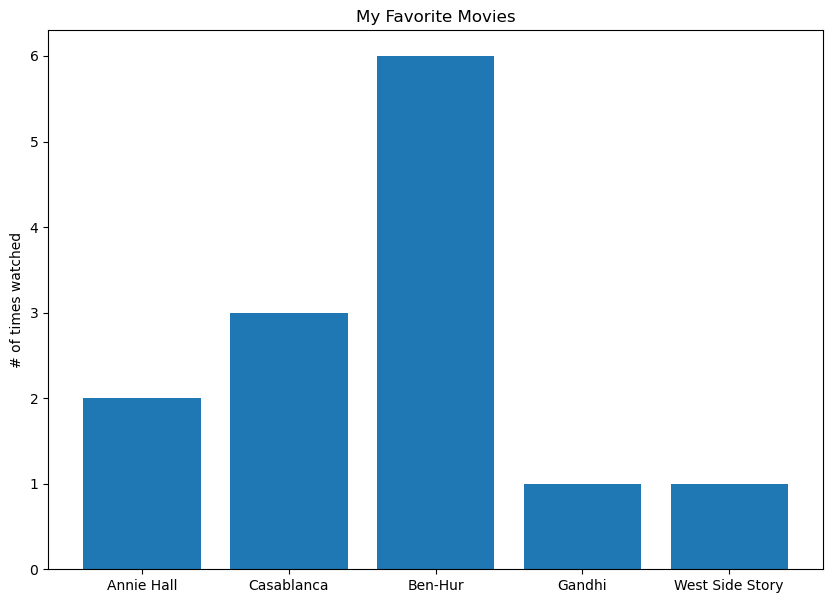

In [20]:
Counter(movies2)

plt.bar(Counter(movies2).keys(), Counter(movies2).values())
plt.title("My Favorite Movies")     # add a title
plt.ylabel("# of times watched")   # label the y-axis

plt.show()

### Histograms



In [21]:
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

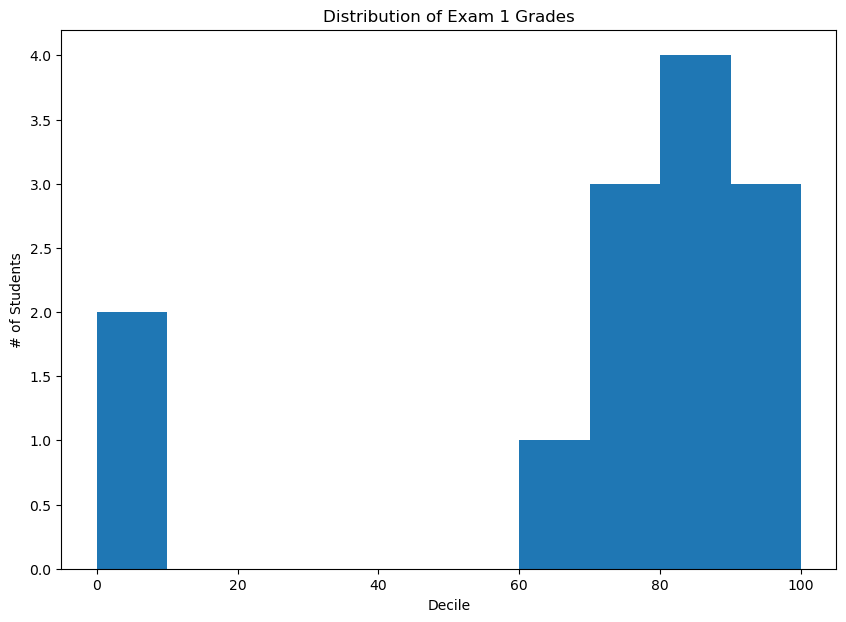

In [22]:
plt.hist(grades)
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

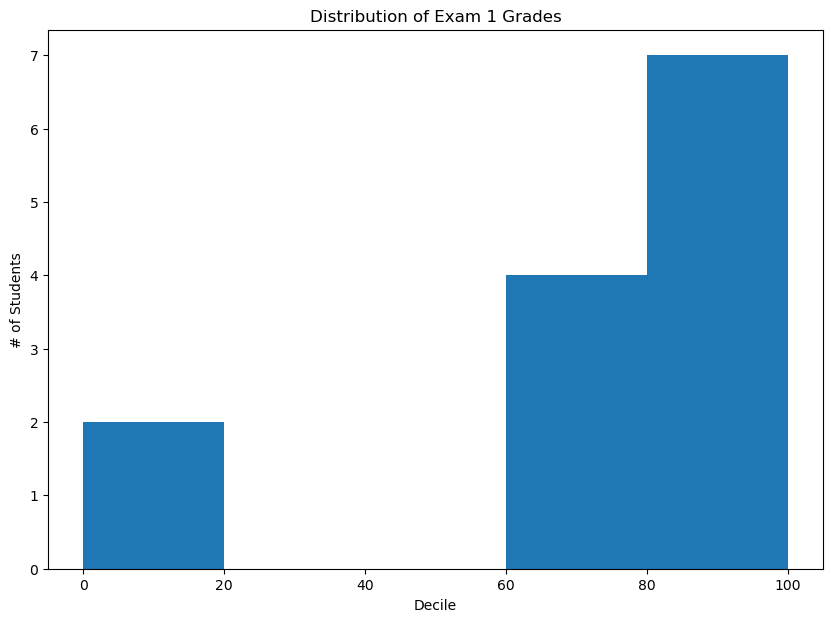

In [23]:
# Setting bin numbers
plt.hist(grades, bins = 5)
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

### Scatterplots

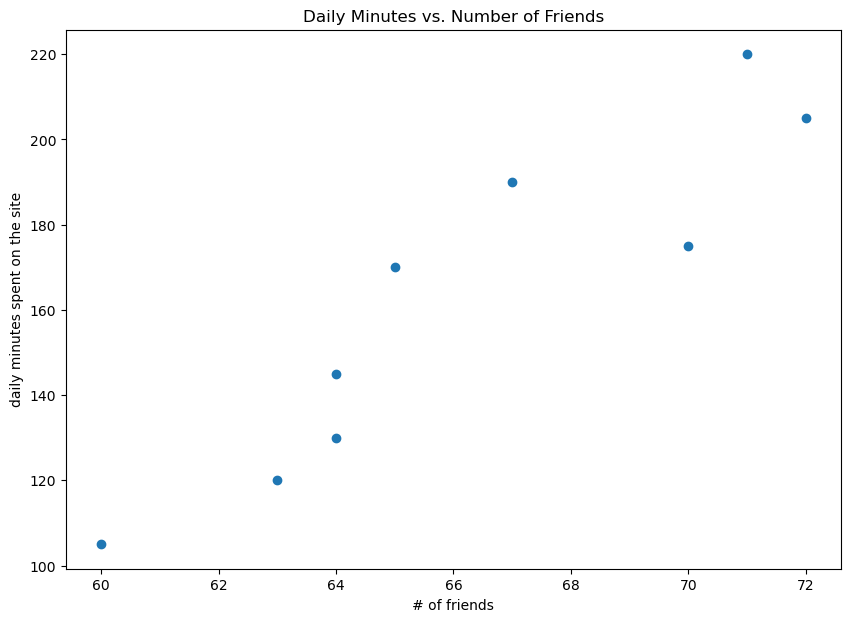

In [24]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]

plt.scatter(friends, minutes)
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

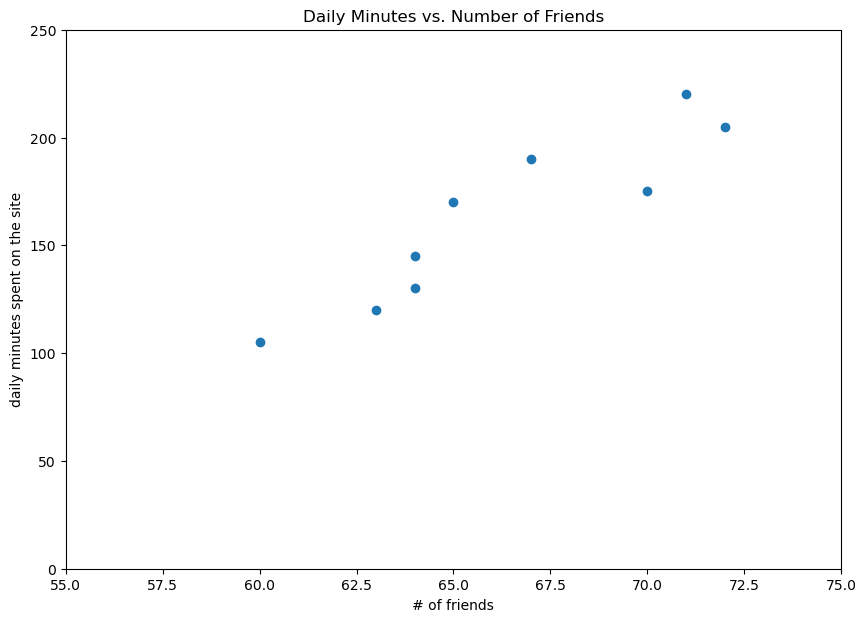

In [25]:
# changing axies
plt.scatter(friends, minutes)
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.axis([55, 75, 0, 250])
plt.show()

## Pandas

Pandas Series and DataFrames have inbuild plotting methods, which we will look closer at in this section.

First, we load in some example data, namely the Titanic survival dataset.

In [26]:
titanic_data = pd.read_csv("titanic_survival_data.csv")

In [27]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,712.833,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.000,S
887,1,1,female,19.0,0,0,30.000,S
888,0,3,female,NaN,1,2,23.450,S
889,1,1,male,26.0,0,0,30.000,C


In [28]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      868 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


<Axes: >

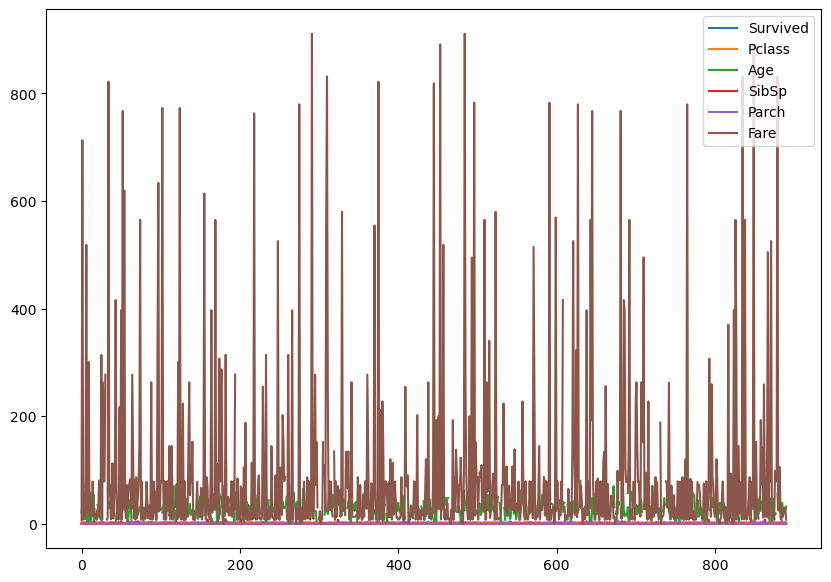

In [29]:
titanic_data.plot()

The `plot` method just plot the values of each numeric variable as lines in the same plot with index as the x-axis. (It leaves out non-numeric variables.) This is rarely useful!

The `hist` method plots the histogram for each numeric variable. Often much more useful...

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

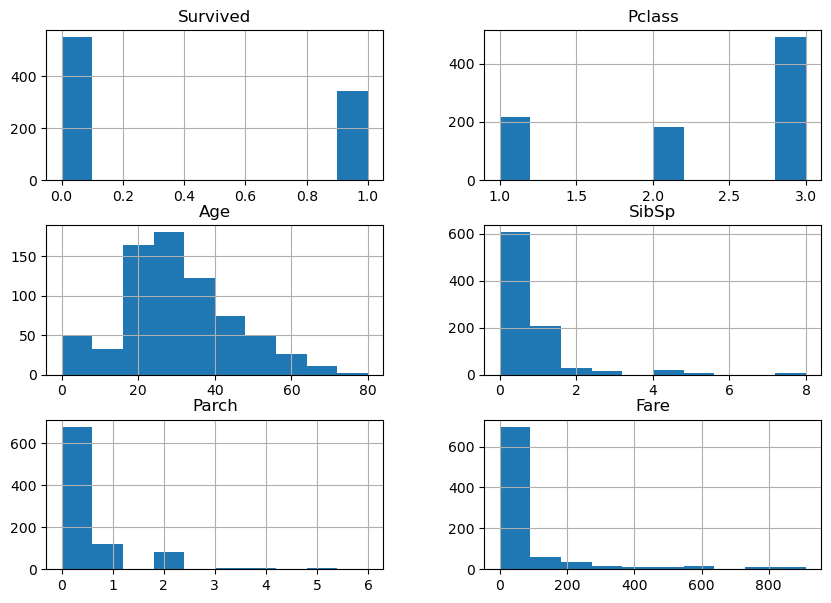

In [30]:
titanic_data.hist()

<Axes: >

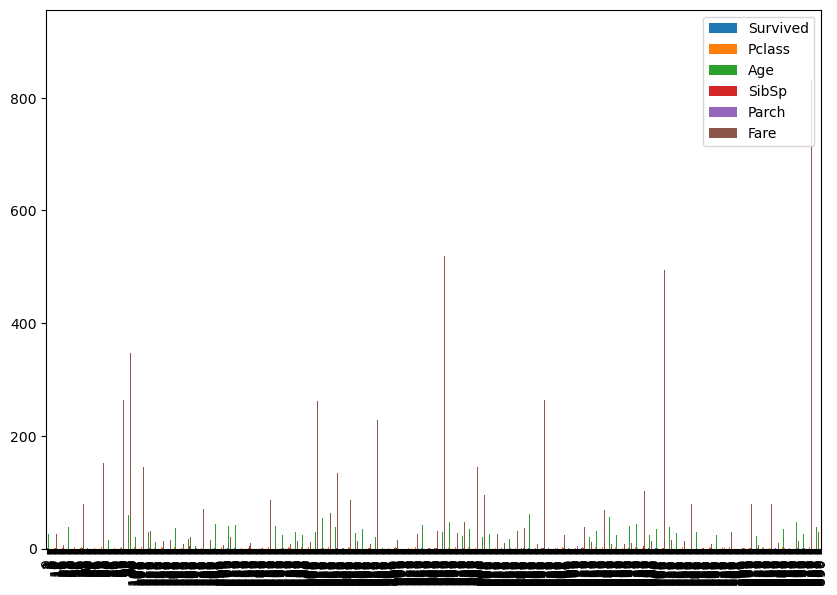

In [31]:
titanic_data.plot.bar()

The `plot.bar` method is not useful for this type of data either. Here is the example from the book, showing that this type of plotting is only useful if you already have aggregated the data to a smaller dataframe.

In [32]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.774651,0.794898,0.207025,0.596510
two,0.544788,0.418690,0.649698,0.262227
three,0.142828,0.427768,0.868059,0.637434
four,0.009363,0.624037,0.567580,0.354290
five,0.228938,0.395562,0.340210,0.487219
six,0.032311,0.577282,0.054764,0.918155


<Axes: >

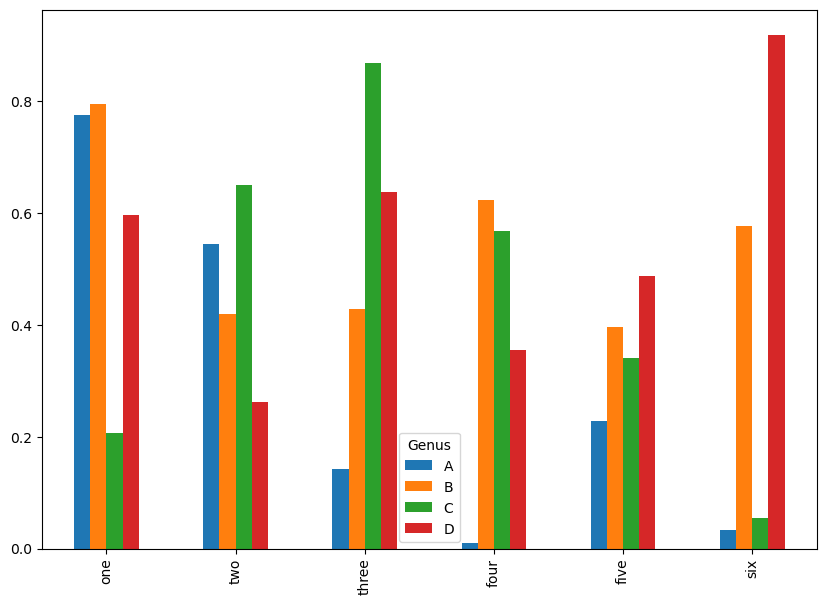

In [33]:
df.plot.bar()

In [34]:
titanic_data["Age"].groupby(titanic_data["Pclass"]).mean()

Pclass
1    38.225806
2    29.855491
3    25.115493
Name: Age, dtype: float64

<Axes: xlabel='Pclass'>

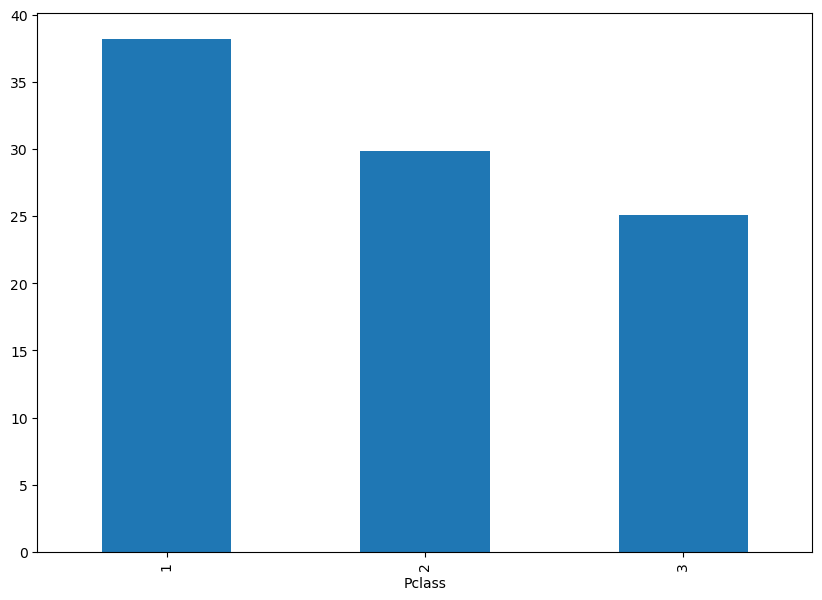

In [35]:
titanic_data["Age"].groupby(titanic_data["Pclass"]).mean().plot.bar()

## Seaborn

Iit is more natural and easier to use in my opinion (we get closer to how plotting works in R). First, we need to import the library (remember to install it into your environment).

In [36]:
import seaborn as sns

We can easily make a barplot of the average fair per passanger class using seaborn barplot. (It also shows 95% confidence interval error bars by default)

<Axes: xlabel='Pclass', ylabel='Fare'>

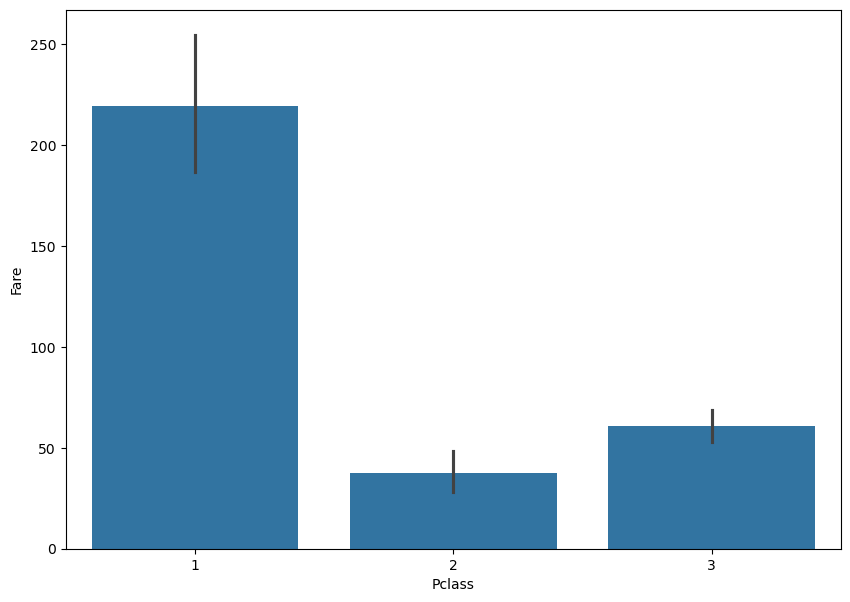

In [37]:
sns.barplot(x="Pclass", y = "Fare", data = titanic_data)

In [38]:
?sns.barplot

Signature:
sns.barplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    seed=None,
    units=None,
    weights=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    hue_norm=None,
    width=0.8,
    dodge='auto',
    gap=0,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    capsize=0,
    err_kws=None,
    ci=<deprecated>,
    errcolor=<deprecated>,
    errwidth=<deprecated>,
    ax=None,
    **kwargs,
)
Docstring:
Show point estimates and errors as rectangular bars.

A bar plot represents an aggregate or statistical estimate for a numeric
variable with the height of each rectangle and indicates the uncertainty
around that estimate using an error bar. Bar plots include 0 in the
axis range, and they are a good choice when 0 is a meaningful value
for the variable to take.

See the :ref:`tutorial 

<Axes: xlabel='Pclass', ylabel='Fare'>

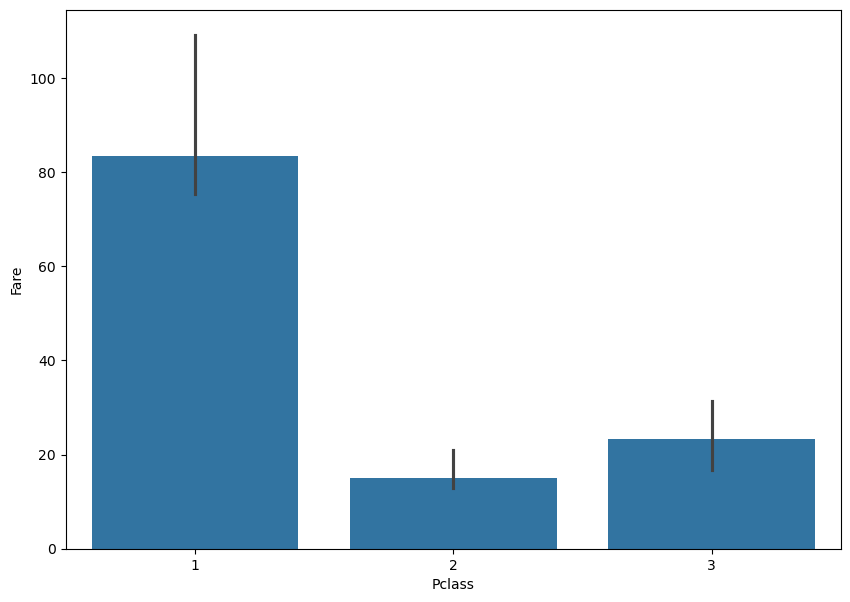

In [39]:
# We can change it to median easily:

sns.barplot(x="Pclass", y = "Fare", data = titanic_data, estimator='median')

To get a better idea of the distribution of Fare for each passanger class, it is more natural to plot a boxplot. This is also easy with seaborn:

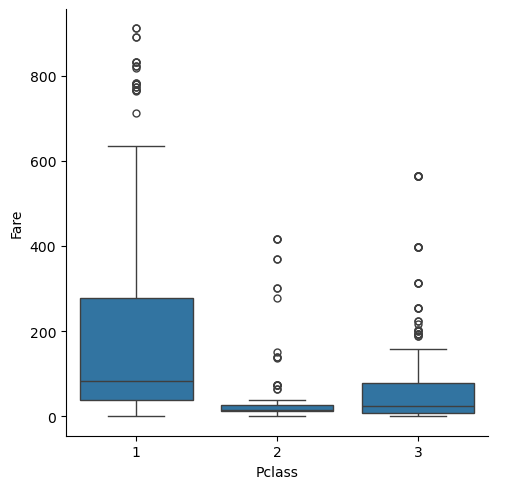

In [40]:
sns.catplot(x="Pclass", y = "Fare", data = titanic_data, kind="box") # Note the boxplot is called "catplot".

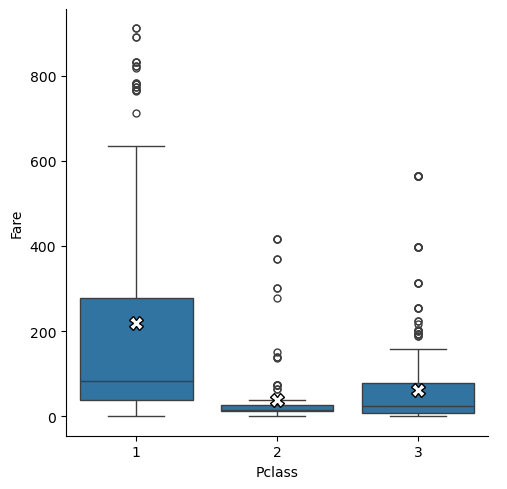

In [41]:
# We can easily add a white x to indicate the mean for each class
sns.catplot(x="Pclass", y = "Fare", data = titanic_data, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})

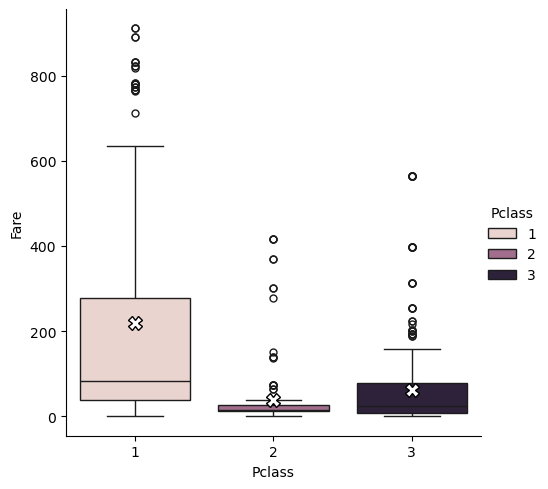

In [42]:
# We can also add a "hue" to give different colors to the different passenger class
sns.catplot(x="Pclass", y = "Fare", hue = "Pclass", data = titanic_data, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})

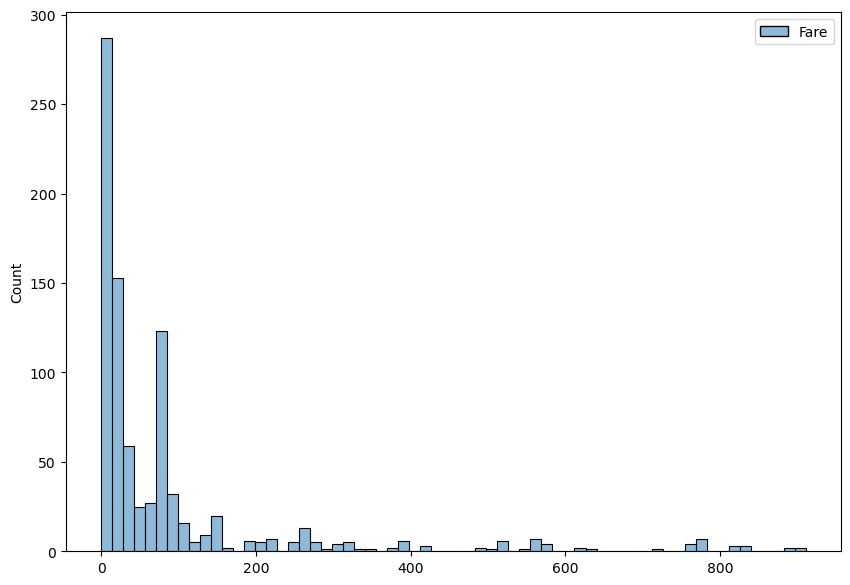

In [43]:
# We can also do a histogram ovre Fares
sns.histplot(titanic_data[["Fare"]])
plt.show()

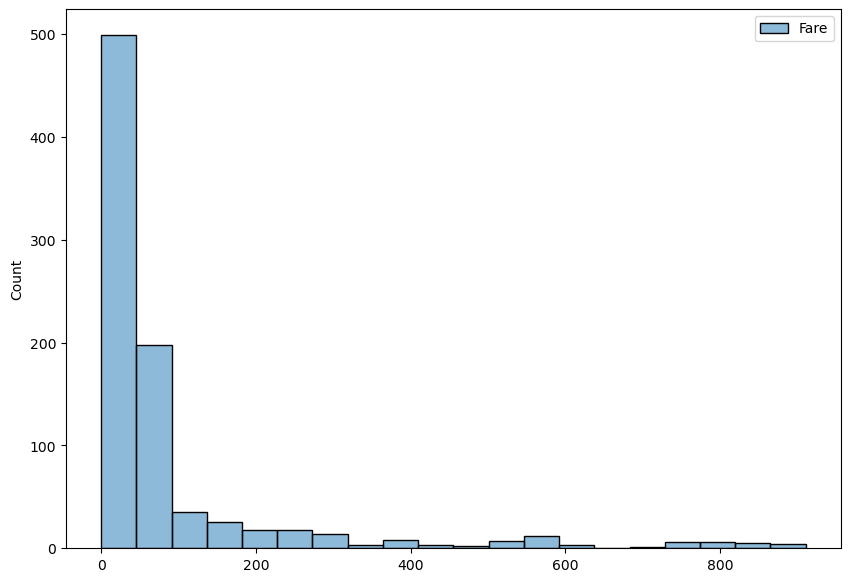

In [44]:
# Adjusting bin size
sns.histplot(titanic_data[["Fare"]], bins = 20)
plt.show()

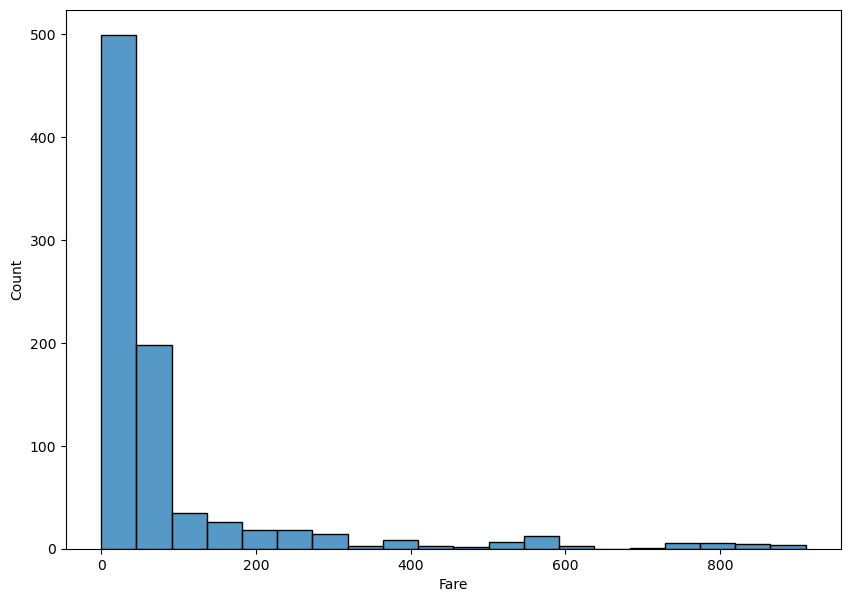

In [45]:
# Another syntax ... for some reason giving slightly different colors?!

sns.histplot(titanic_data, x = "Fare", bins = 20)
plt.show()

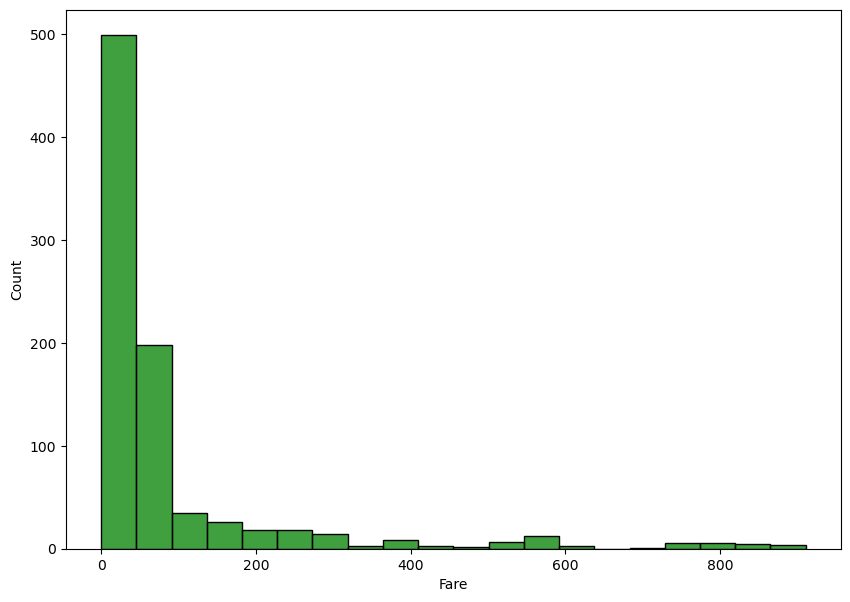

In [46]:
sns.histplot(titanic_data, x = "Fare", color= "green", bins = 20)
plt.show()

We can also easily make a barplot of how many passengers (rows) there are in each class:

<Axes: xlabel='Pclass', ylabel='count'>

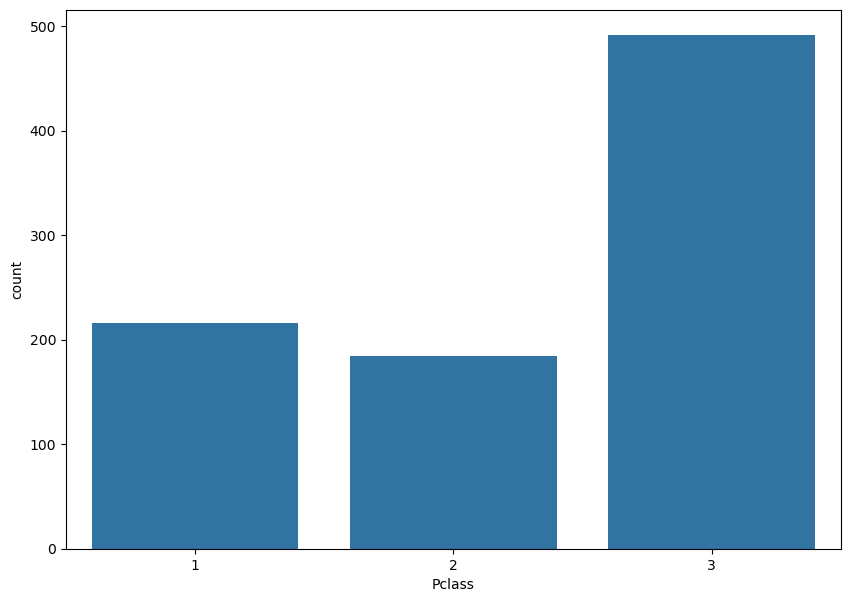

In [47]:
sns.countplot(x = "Pclass", data = titanic_data)

In [48]:
# We can verify the numbers using the value_counts method
titanic_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

We can make the plot nicer with titles etc from matplotlib:

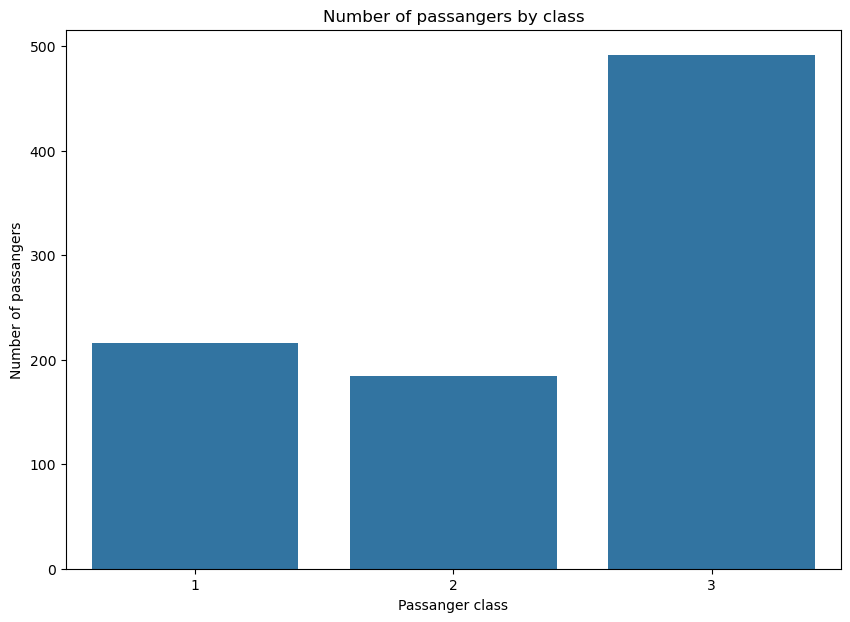

In [49]:
sns.countplot(x = "Pclass", data = titanic_data)
plt.title("Number of passangers by class")
plt.xlabel("Passanger class")
plt.ylabel("Number of passangers")
plt.show()

We can also make regression plots with a regression line

<Axes: xlabel='Age', ylabel='Fare'>

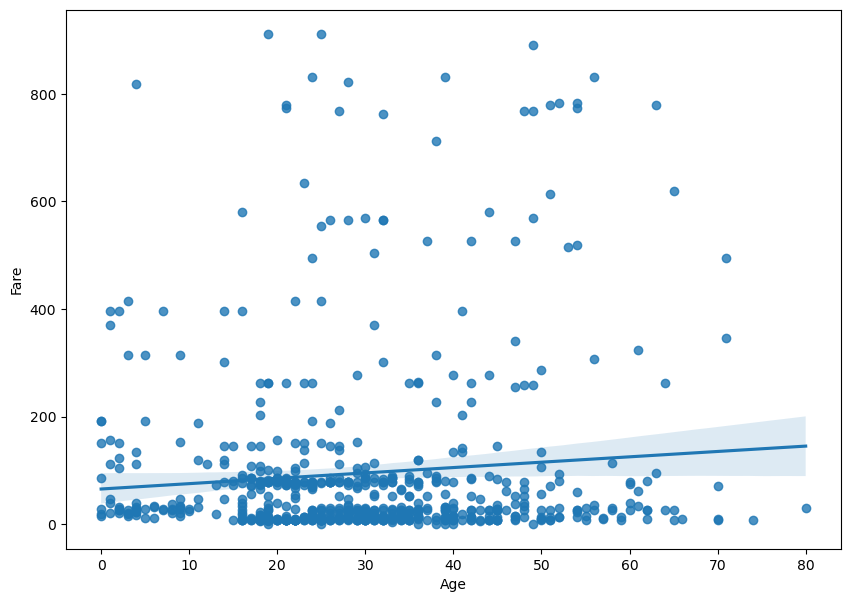

In [50]:
sns.regplot(x = "Age", y = "Fare", data = titanic_data)

We can also get all scatterplots among variables of a dataframe in one go, which will allow us to easily spot potential correlations.

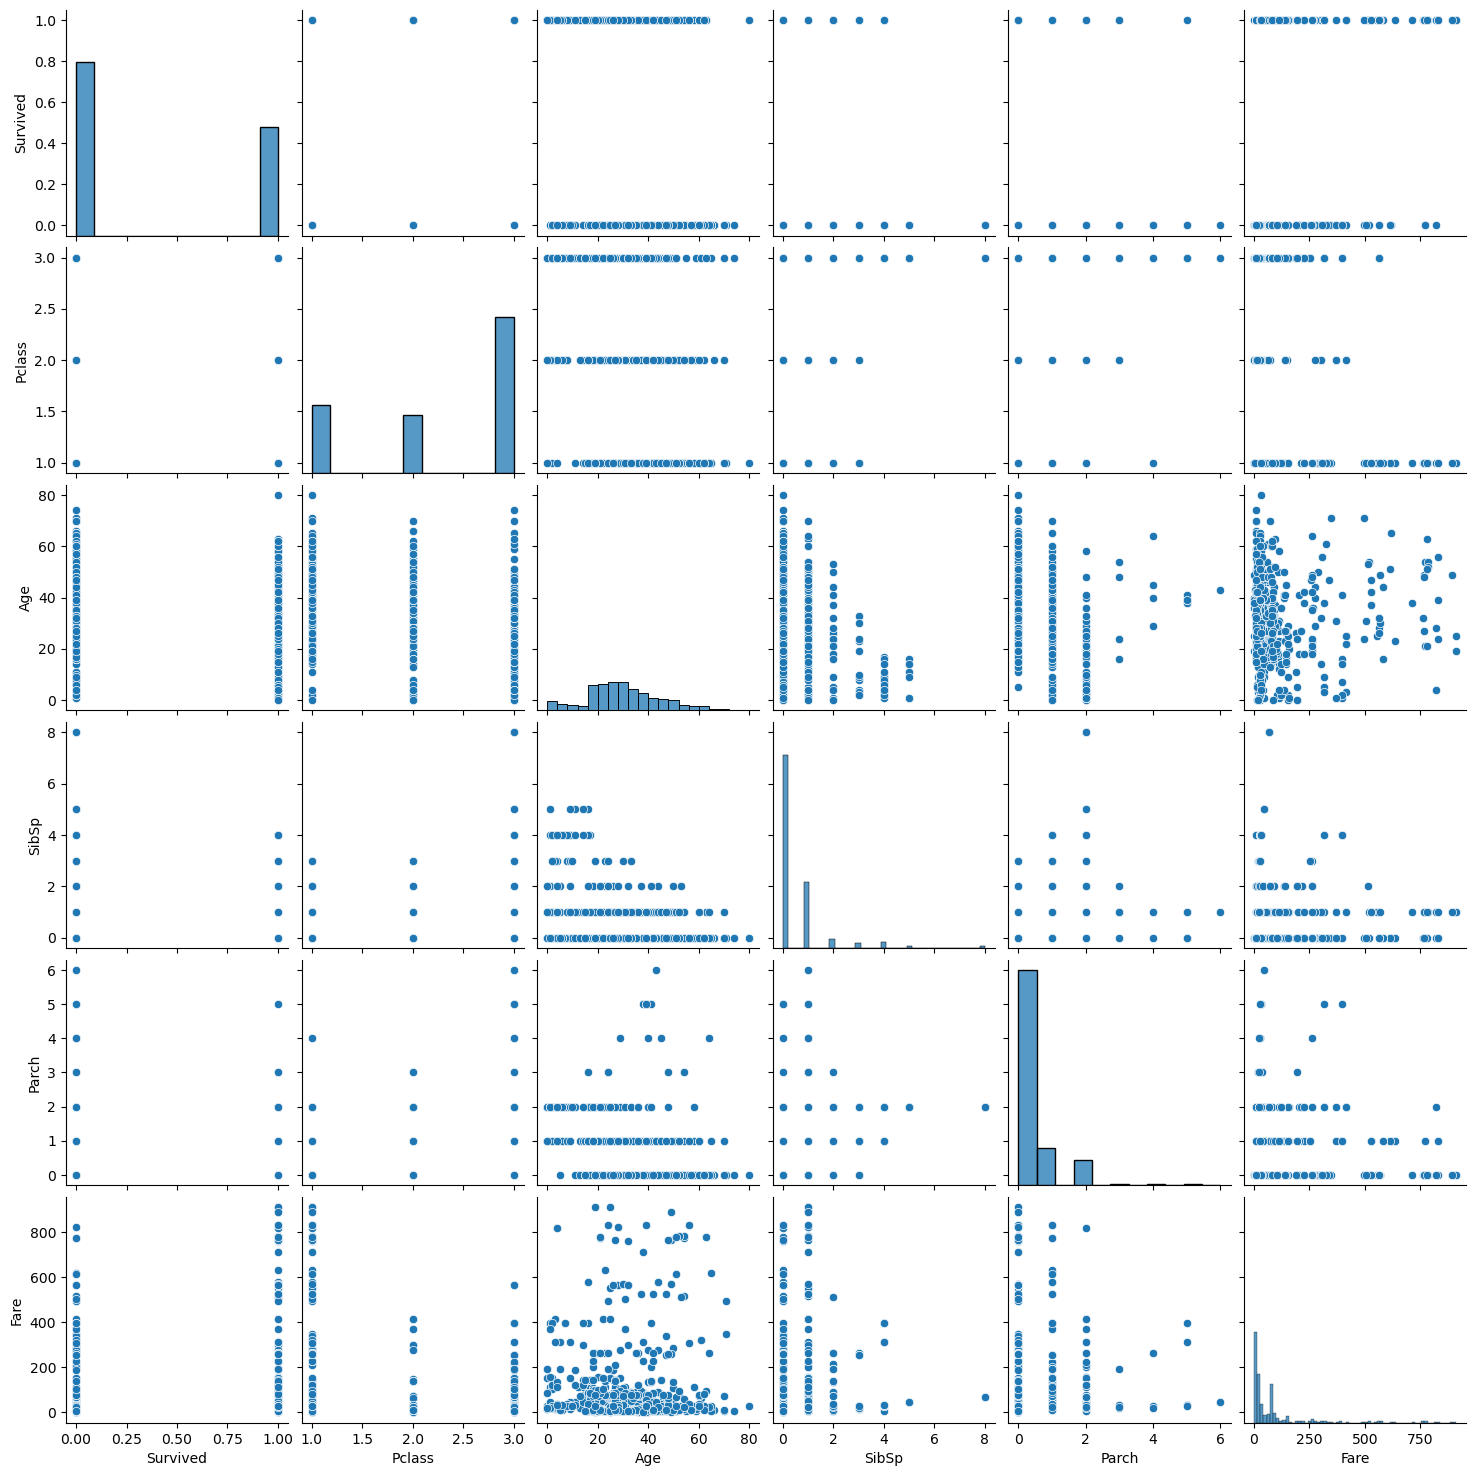

In [51]:
sns.pairplot(data = titanic_data)

### Multiple plots based on variable



We can arrange multiple plots in a grid based on other variables along the rows and columns. It can be highly usefull to visualize more complex relationshops among multplie variables.

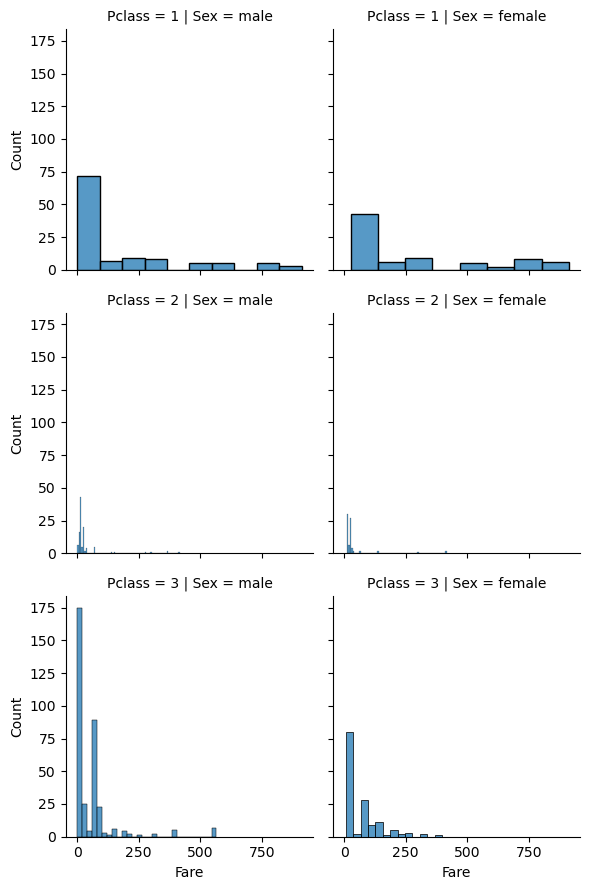

In [52]:
g=sns.FacetGrid(titanic_data, col="Sex", row="Pclass")
g.map(sns.histplot, "Fare")

We can also use the `hue` argument to draw multiple boxes in the same plot, for instance.

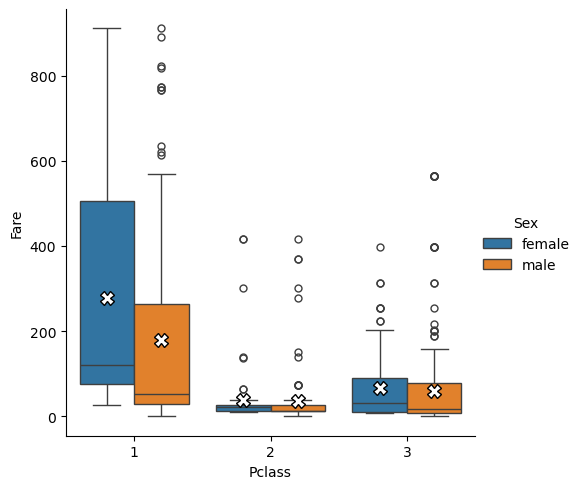

In [53]:
sns.catplot(x="Pclass", y = "Fare", hue = "Sex", data = titanic_data, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})